<a href="https://colab.research.google.com/github/NuttharikaTht/MovieIMDbScoreModel/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [ ]:
df = pd.read_csv("./movie_metadata.csv")

# Dataset Checking

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# Data Preparation

In [ ]:
# Removing Attrb that not relevant

df.drop( 'movie_imdb_link', axis=1, inplace = True)
df.drop('movie_title',axis=1,inplace=True)
df.drop( 'num_critic_for_reviews', axis=1, inplace = True)
df.drop( 'gross', axis=1, inplace = True)
df.drop( 'num_voted_users', axis=1, inplace = True)
df.drop( 'num_user_for_reviews', axis=1, inplace = True)
df.drop( 'title_year', axis=1, inplace = True)
df.drop( 'movie_facebook_likes', axis=1, inplace = True)
df.drop( 'cast_total_facebook_likes',axis=1,inplace=True)

In [ ]:
df.columns

Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'genres', 'actor_1_name', 'movie_title', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'language',
       'country', 'content_rating', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio'],
      dtype='object')

In [ ]:
df.shape

(5043, 21)

In [ ]:
# Checking NaN Value in each Attrb
df.isna().any()

color                         True
director_name                 True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
genres                       False
actor_1_name                  True
movie_title                  False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
language                      True
country                       True
content_rating                True
budget                        True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
dtype: bool

In [ ]:
#Checking Number of NaN Value in each Attrb
df.isna().sum()

color                         19
director_name                104
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
genres                         0
actor_1_name                   7
movie_title                    0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
language                      12
country                        5
content_rating               303
budget                       492
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
dtype: int64

In [ ]:
new_df = df.dropna()

In [ ]:
df.shape

(5043, 21)

In [ ]:
new_df.isna().sum()

color                        0
director_name                0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
genres                       0
actor_1_name                 0
movie_title                  0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
language                     0
country                      0
content_rating               0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
dtype: int64

In [ ]:
new_df.shape

(4141, 21)

In [ ]:
df = new_df

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(4944, 21)

In [ ]:
#Check Amount in Each Language of Movies
df["language"].value_counts()

English       3871
French          39
Spanish         27
Mandarin        16
Japanese        13
German          10
Italian          8
Hindi            7
Cantonese        7
Portuguese       6
Korean           5
Norwegian        4
Persian          3
Danish           3
Thai             3
Dutch            3
Russian          3
Dari             2
Zulu             2
Aboriginal       2
None             2
Indonesian       2
Romanian         1
Vietnamese       1
Arabic           1
Hebrew           1
Filipino         1
Czech            1
Mongolian        1
Maya             1
Kazakh           1
Hungarian        1
Aramaic          1
Bosnian          1
Swedish          1
Name: language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


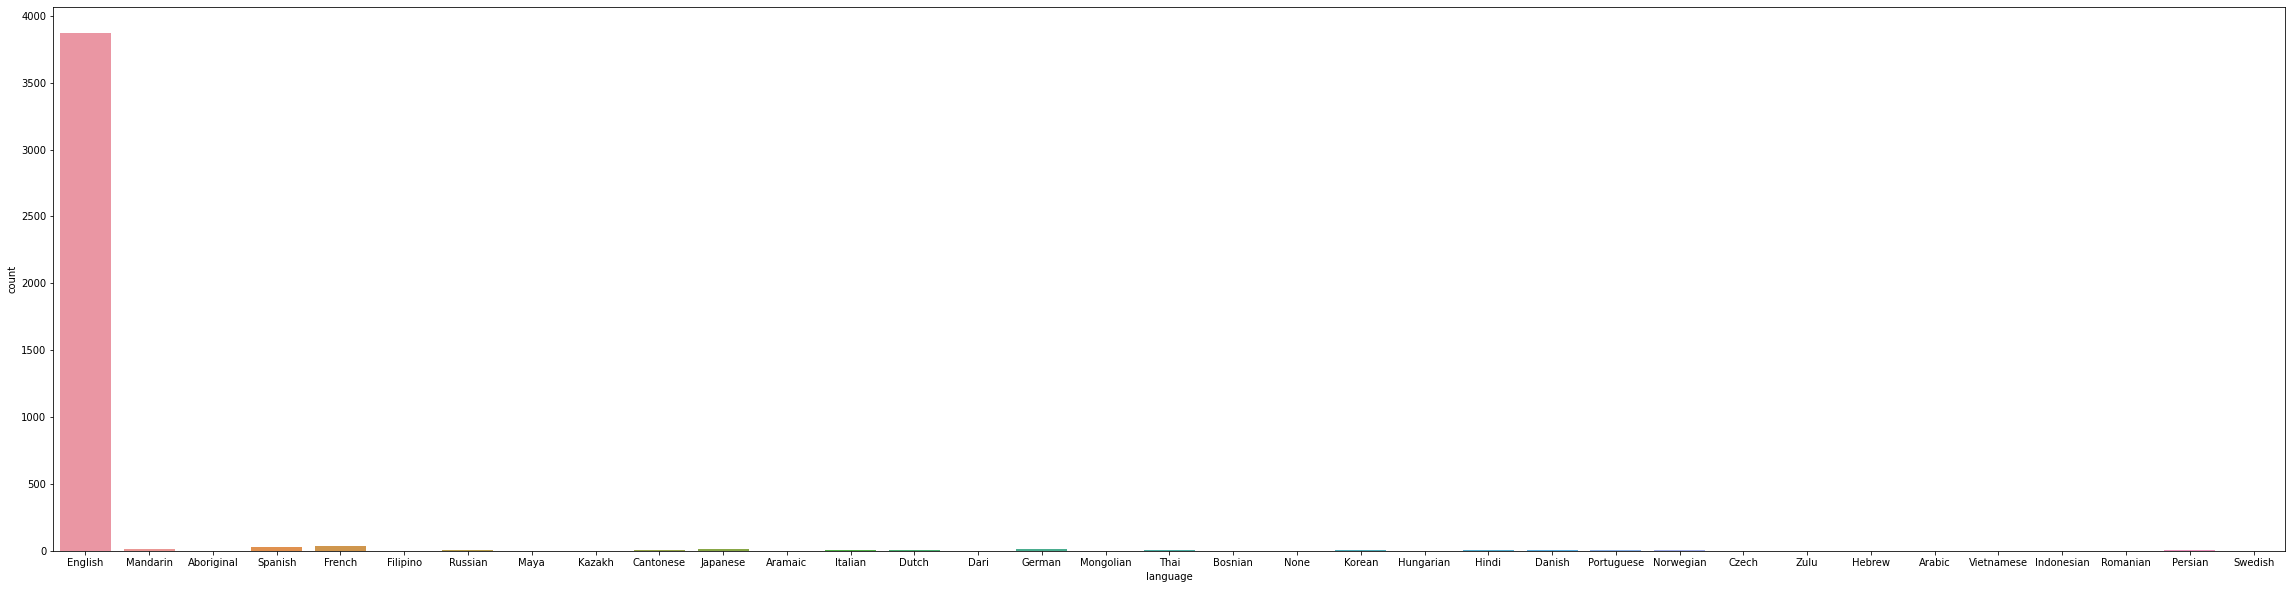

In [ ]:
# Data Presentaion 
plt.figure(figsize=(40,10))
sns.countplot(df["language"])
plt.show()

In [ ]:
#Drop Language Column because Most of Movie is in English

df.drop('language',axis=1,inplace=True)

In [ ]:
df["country"].value_counts()

USA               3170
UK                 350
France             113
Germany             84
Canada              83
Australia           46
Spain               25
Japan               18
Italy               16
China               14
Hong Kong           13
New Zealand         12
South Korea          9
Denmark              8
Mexico               7
India                7
Ireland              7
Norway               6
Brazil               6
South Africa         5
Russia               4
Iran                 4
Thailand             4
Netherlands          4
Czech Republic       3
Argentina            3
Taiwan               2
Hungary              2
West Germany         2
Romania              2
Belgium              1
Bahamas              1
Switzerland          1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Israel               1
Poland               1
Colombia             1
New Line             1
Iceland              1
Finland              1
Greece               1
Soviet Unio

In [ ]:
#Drop Country Column because Most of Movie is in USA

df.drop('country',axis=1,inplace=True)

In [ ]:
df["color"].value_counts()

Color               3880
 Black and White     171
Name: color, dtype: int64

In [ ]:
df.drop('color',axis=1,inplace=True)

In [ ]:
df.head()

,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,actor_3_name,facenumber_in_poster,plot_keywords,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio
0,James Cameron,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,0.0,avatar|future|marine|native|paraplegic,PG-13,237000000.0,936.0,7.9,1.78
1,Gore Verbinski,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,300000000.0,5000.0,7.1,2.35
2,Sam Mendes,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,PG-13,245000000.0,393.0,6.8,2.35
3,Christopher Nolan,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,PG-13,250000000.0,23000.0,8.5,2.35
5,Andrew Stanton,132.0,475.0,530.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,PG-13,263700000.0,632.0,6.6,2.35


In [ ]:
df.shape

(4051, 16)

In [ ]:
df.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'genres', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'content_rating', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio'],
      dtype='object')

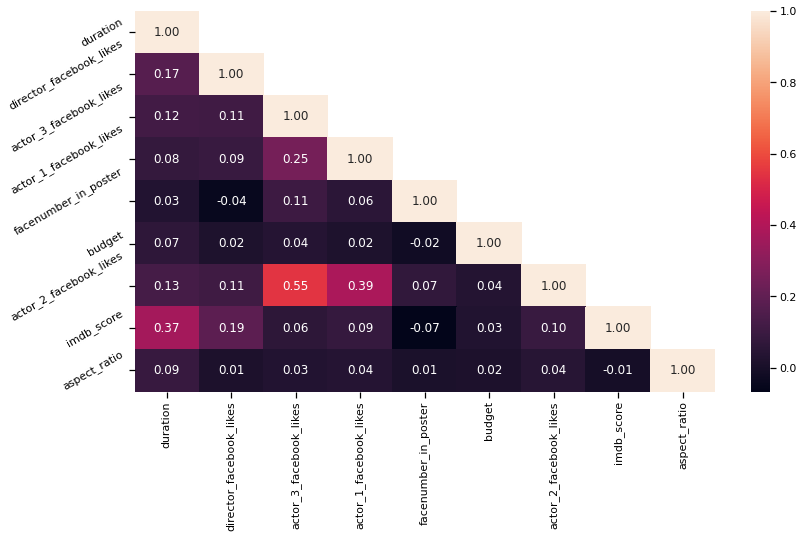

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Splitting the data into training and test data

In [ ]:
X=pd.DataFrame(columns=['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'genres', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'content_rating', 'budget', 'actor_2_facebook_likes',
       'aspect_ratio'], data=df)
y=pd.DataFrame(columns=['imdb_score'],data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Feature Scaling

In [ ]:
print(X_train)

          director_name  duration  director_facebook_likes  \
2977     Darnell Martin     109.0                     67.0   
1084   Denis Villeneuve     153.0                    777.0   
2859        Spike Jonze     112.0                      0.0   
3907        Woody Allen      96.0                  11000.0   
4402    Adrienne Shelly     108.0                    191.0   
...                 ...       ...                      ...   
4741  Morgan J. Freeman      86.0                    204.0   
4781    Paul Greengrass     107.0                    521.0   
1987    Lasse Hallström     116.0                    529.0   
3119      Peter Sollett      90.0                      6.0   
1640       Ridley Scott     125.0                      0.0   

      actor_3_facebook_likes            actor_2_name  actor_1_facebook_likes  \
2977                   192.0           Veronika Dash                   436.0   
1084                  1000.0         Jake Gyllenhaal                 20000.0   
2859           

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

ValueError: ignored